# Imports and Functions

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from imblearn.datasets import make_imbalance
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl",3))

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_curve, auc, precision_recall_curve, average_precision_score, classification_report



# Data and EDA

In [6]:
# The data has already been 
credit = pd.read_csv('/Users/Leo/leoloman_github/leoloman_github/creditcard.csv')

In [7]:
print('This dataframe consists of {} rows and {} columns'.format(credit.shape[0],credit.shape[1]))

This dataframe consists of 284807 rows and 31 columns


In [8]:
data_dict = {'Time':'Number of seconds elapsed between this transaction and the first transaction in the dataset, this is over the course of a 2 day period',
            'V1-V28':'PCA Treated Columns',
            'Amount':'Transaction Amount',
            'Class':'1 for Fraudulent and 0 for otherwise'}

In [9]:
credit.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [10]:
# Columns V1 to V31 are principal components obtained through PCA, Time, Amount and Class are as they 
# Originally were.
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
# Since a the majority of the features have been anonymised I will focus on Time and Amount first and 
# see how they are classed and then investigate the dataset as a whole

In [12]:
# Hav
credit.loc[:,['Time','Amount']].describe()

Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


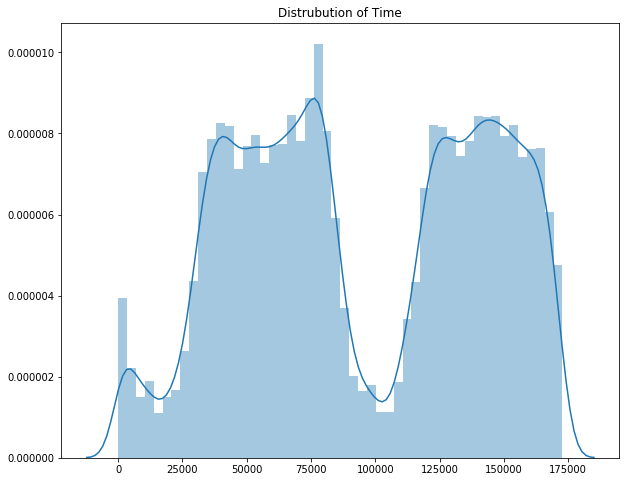

In [13]:
plt.figure(figsize=(10,8))
sns.distplot(credit.loc[:,['Time']])
plt.title('Distrubution of Time')
plt.show()
# From this you can see a night time period where less transactions are taking place

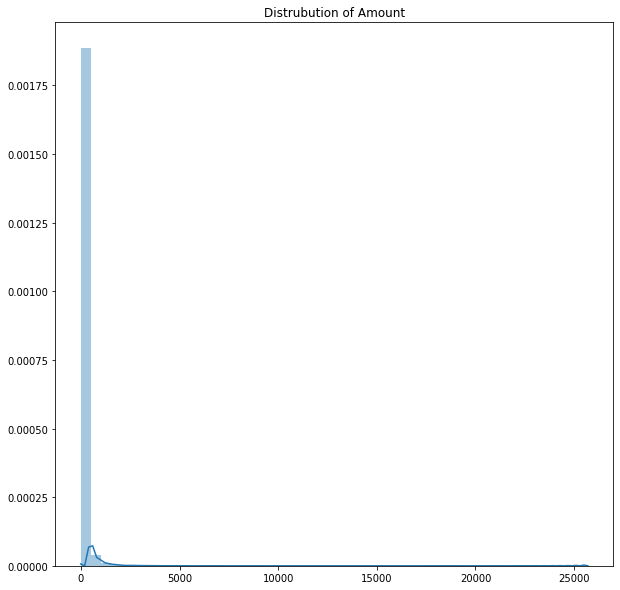

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(credit.loc[:,['Amount']])
plt.title('Distrubution of Amount')
plt.show()
# The mean amount spent is $88.4,the max spent is $25,691 and 75% of the data is underneath $77.2. 
# This tells me that the data is heavily skewed to the right.

In [15]:
time_amount = credit.loc[:,['Time','Amount','Class']]

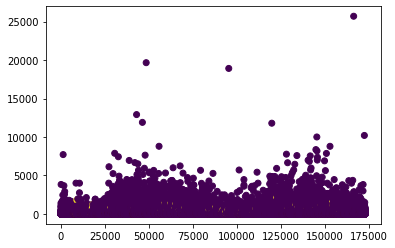

In [16]:
plt.scatter(time_amount.Time, time_amount.Amount, c=time_amount.Class)

In [17]:
fraud = time_amount[time_amount.Class == 1]

In [18]:
true = time_amount[time_amount.Class == 0]

<function matplotlib.pyplot.show(*args, **kw)>

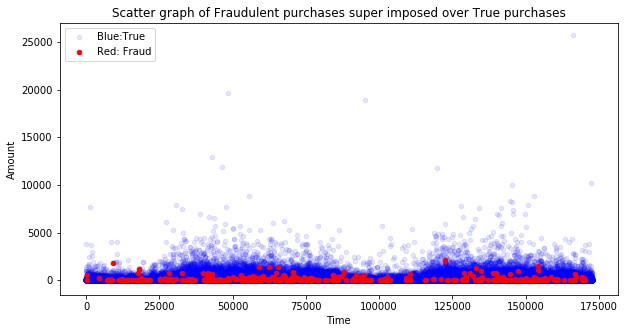

In [19]:
fig,ax = plt.subplots(figsize=(10,5))
true.plot(x='Time',y='Amount',kind='scatter', ax=ax, c='blue',alpha=.1)
fraud.plot(x='Time',y='Amount',kind='scatter', ax=ax, c='red')
plt.legend(['Blue:True','Red: Fraud']);
plt.title('Scatter graph of Fraudulent purchases super imposed over True purchases')
plt.show

In [20]:
fraud.describe()['Amount']

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
true.describe()['Amount']

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
# We can see that a large majority of the data is extremely small, and that there is an extremely small
# amount of fraudulent transactions (0.17%).

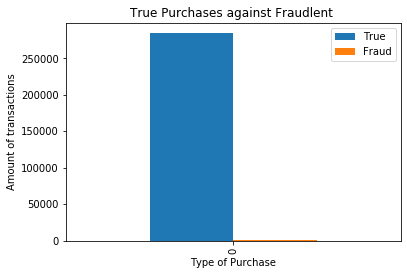

In [23]:
#{'True':284315,'Fraud':492}
true_fraud = pd.DataFrame([[284315,492]],columns=['True','Fraud'])
true_fraud.plot(kind='bar')
plt.title('True Purchases against Fraudlent ')
plt.ylabel('Amount of transactions')
plt.xlabel('Type of Purchase')
plt.show()

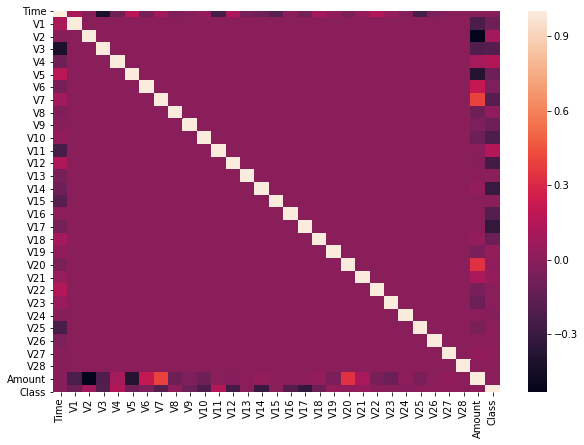

In [24]:
# Heat map showing the correlation between the variables
plt.figure(figsize=(10,7))
sns.heatmap(credit.corr())
plt.show()

## Preparing the Time and Amount

In [25]:
# The Time and Amount Variables must be standardised so they are around 0, this is because all of
# the rest of the data is centred around 0 and it could cause some issues with ML algorithms.

In [26]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
time_std = scaler1.fit_transform(credit[['Time']])
amount_std = scaler2.fit_transform(credit[['Amount']])

In [27]:
std_date_time = pd.DataFrame({'Time':time_std.flatten(),'Amount':amount_std.flatten()})

In [28]:
# dropping old amount and time columns
credit_v2 = credit.drop(['Amount', 'Time'], axis=1,)

In [29]:
credit_v3 = pd.concat([credit_v2,std_date_time], axis=1)

In [30]:
credit_v3.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10    ...          V22       V23       V24  \
0  0.098698  0.363787  0.090794    ...     0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974    ...    -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643    ...     0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952    ...     0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074    ...     0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class      Time    Amount  
0  0.128539 -0.189115  0.133558 -0.021053      0 -1.996583  0.244964  
1  0.167170  0.125895 -0.008983  0.014724      0 -1.996583 -0.342475  
2 -0.327642 -0.139097 -0.055353 -0.059752      0 -1.996562  1.160686  
3  0.647376 -0.221929  0.062723  0.061458      0 -1.996562  0.140534  
4 -0.206010  0.502292  0.219422  0.215153      0 -1.996541 -0.073403  

[5 rows x 31 columns]

## Dealing with the imbalance of data

### Undersampling the Majority Class

In [31]:
credit_fraud = credit_v3[credit_v3.Class == 1]
print('There are {} fraudulent casses present'.format(credit_fraud.shape[0]))

There are 492 fraudulent casses present


In [32]:
credit_non_fraud = credit_v3[credit_v3.Class == 0]

In [33]:
under_sampled_nonfraud = credit_non_fraud.sample(credit_fraud.shape[0],random_state=1)

In [34]:
under_sampled_nonfraud.head()

V1        V2        V3        V4        V5        V6        V7  \
106066  0.136174 -1.647766  0.850033  1.576178 -1.569057 -0.106752  0.026632   
102005 -0.911610  0.680815  1.344329 -0.068517  0.596394 -1.268838  0.769226   
278450 -0.917299  0.860942  1.201170 -0.962314 -0.372495 -0.114847  0.001741   
120218  1.252596  0.021359  0.044063  0.325909  0.011174 -0.053598 -0.097035   
258527 -1.109483  1.061341  1.484072  0.923891 -0.137718  0.816640  0.014252   

              V8        V9       V10    ...          V22       V23       V24  \
106066 -0.091738  0.517553 -0.332990    ...     0.582371 -0.548530  0.456719   
102005 -0.134888 -0.247848 -0.551040    ...     0.252879 -0.228605  0.360421   
278450  0.699885 -0.040284 -0.737621    ...    -0.493530  0.001530 -0.370406   
120218  0.013237  0.263268 -0.097356    ...    -0.266459 -0.071237 -0.749998   
258527  0.938303 -0.125829 -0.521974    ...    -1.369632 -0.020618  0.578319   

             V25       V26       V27       V28  Class      Time    Amount  
106066  0.202315 -0.314320 -0.018220  0.138062      0 -0.526571  1.805737  
102005  0.043382 -0.588531 -0.026174  0.159864      0 -0.564328 -0.325683  
278450 -0.392434  0.304997  0.177416  0.115137      0  1.546013 -0.273308  
120218  0.389529  0.494047 -0.029793  0.002433      0 -0.401424 -0.282063  
258527  0.329709 -0.825568  0.209439  0.068794      0  1.345183 -0.255356  

[5 rows x 31 columns]

In [35]:
# I chose to make an equal dataset of fraud and non fraud, this is because I believe that 
# it will create an effective training data set as it will have the same amount of each class to lear from

# It may cause some issues though since it is a small dataset


In [36]:
merged_sample = pd.concat([under_sampled_nonfraud, credit_fraud])

In [37]:
merged_sample.head()

V1        V2        V3        V4        V5        V6        V7  \
106066  0.136174 -1.647766  0.850033  1.576178 -1.569057 -0.106752  0.026632   
102005 -0.911610  0.680815  1.344329 -0.068517  0.596394 -1.268838  0.769226   
278450 -0.917299  0.860942  1.201170 -0.962314 -0.372495 -0.114847  0.001741   
120218  1.252596  0.021359  0.044063  0.325909  0.011174 -0.053598 -0.097035   
258527 -1.109483  1.061341  1.484072  0.923891 -0.137718  0.816640  0.014252   

              V8        V9       V10    ...          V22       V23       V24  \
106066 -0.091738  0.517553 -0.332990    ...     0.582371 -0.548530  0.456719   
102005 -0.134888 -0.247848 -0.551040    ...     0.252879 -0.228605  0.360421   
278450  0.699885 -0.040284 -0.737621    ...    -0.493530  0.001530 -0.370406   
120218  0.013237  0.263268 -0.097356    ...    -0.266459 -0.071237 -0.749998   
258527  0.938303 -0.125829 -0.521974    ...    -1.369632 -0.020618  0.578319   

             V25       V26       V27       V28  Class      Time    Amount  
106066  0.202315 -0.314320 -0.018220  0.138062      0 -0.526571  1.805737  
102005  0.043382 -0.588531 -0.026174  0.159864      0 -0.564328 -0.325683  
278450 -0.392434  0.304997  0.177416  0.115137      0  1.546013 -0.273308  
120218  0.389529  0.494047 -0.029793  0.002433      0 -0.401424 -0.282063  
258527  0.329709 -0.825568  0.209439  0.068794      0  1.345183 -0.255356  

[5 rows x 31 columns]

In [39]:
# Frac=1 is necessary to shuffle the data set
new_train = merged_sample.sample(frac=1, random_state=1).reset_index(drop=True)

In [40]:
new_train.head()

V1        V2         V3         V4         V5        V6         V7  \
0   1.868226  1.363077  -1.994934   4.173516   1.239751 -0.746186   0.572731   
1  -0.372224  0.850924   0.819148  -0.597507   0.941464  0.866622   0.429409   
2  -0.435970 -0.795462  -0.680776  -1.731704   1.434804 -2.180876   0.369731   
3 -13.086519  7.352148 -18.256576  10.648505 -11.731476 -3.659167 -14.873658   
4   1.232604 -0.548931   1.087873   0.894082  -1.433055 -0.356797  -0.717492   

         V8        V9        V10    ...          V22       V23       V24  \
0 -0.131235 -1.551839   0.228849    ...    -0.818972  0.206812 -0.263683   
1  0.376960 -0.414962  -0.159481    ...    -0.753344 -0.213051 -1.752268   
2 -0.318681 -1.723893   0.560442    ...     1.480765  0.031083  0.114248   
3  8.810473 -5.418204 -13.202577    ...    -0.266162 -0.412861  0.519952   
4  0.003167 -0.100397   0.543187    ...    -0.517568  0.012833  0.699217   

        V25       V26       V27       V28  Class      Time    Amount  
0 -0.114958 -0.240672 -0.006629  0.017258      1  1.278809 -0.340675  
1 -0.095216  0.193437  0.270997  0.087904      0 -0.968135 -0.348072  
2 -0.616473 -0.154790  0.142698  0.242053      0  1.008783 -0.280904  
3 -0.743909 -0.167808 -2.498300 -0.711066      1 -0.019686 -0.232047  
4  0.527258 -0.322607  0.080805  0.035427      1 -0.557127 -0.274907  

[5 rows x 31 columns]

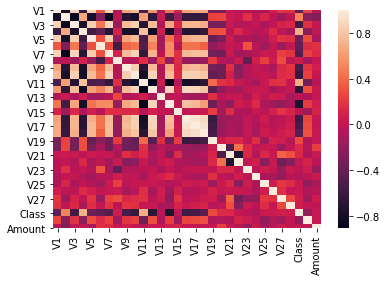

In [41]:
# This is a bit harder to intepret due to there being more areas of interest to look into
sns.heatmap(new_train.corr())

In [42]:
# Taking a look at the correlation of the equal dataset
train_cor = new_train.corr()

In [43]:
train_cor = train_cor[['Class']]

In [44]:
# Variables with High Positive Correlation -- Class is ignored
train_cor[train_cor.Class > .5]

Class
V2     0.503636
V4     0.703725
V11    0.689654
Class  1.000000

In [45]:
# Variables with High Negative Correlation 
train_cor[train_cor.Class < -.5]

Class
V3  -0.566161
V9  -0.546138
V10 -0.628838
V12 -0.683432
V14 -0.751046
V16 -0.591130
V17 -0.559071

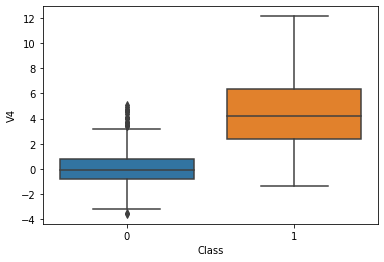

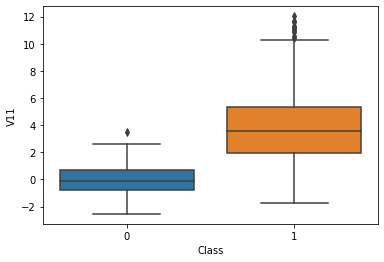

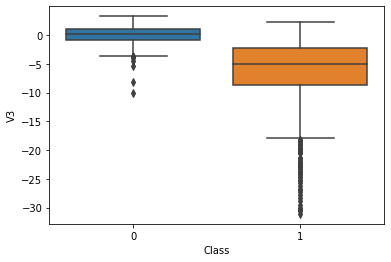

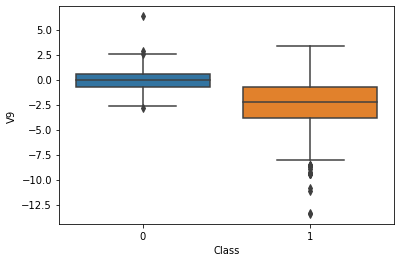

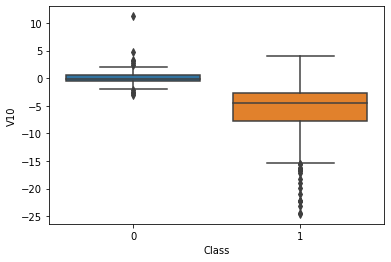

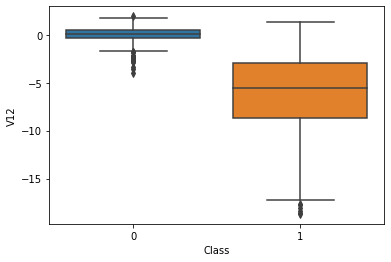

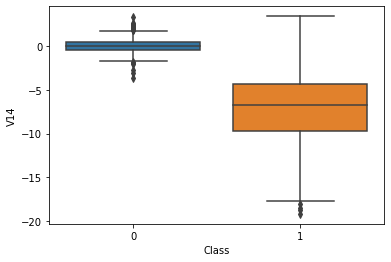

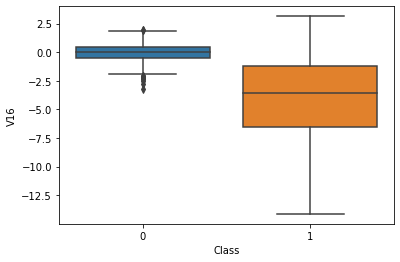

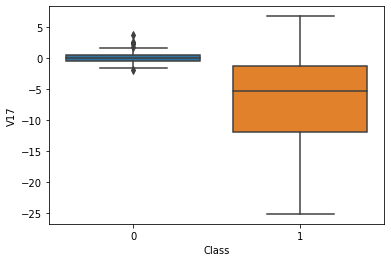

In [46]:
# I will visualise all of these variables.
var = ['V4','V11','V3','V9','V10','V12','V14','V16','V17']

for a in var:
    sns.boxplot(x = 'Class', y = a, data=new_train, );
 
    plt.show()

In [47]:
# From the above graphs some clear outliers can be seen, namely n V17, V14, V10, V3, 

In [48]:
# I will remove any extreme outliers

In [49]:
Q25 = new_train.quantile(0.25)
Q75 = new_train.quantile(0.75)
IQR = Q75 - Q25



In [51]:
train_v2 = new_train[~((new_train < (Q25 - 2.5 * IQR)) |(new_train > (Q75 + 2.5 * IQR))).any(axis=1)]

In [52]:
train_v2.shape

(707, 31)

In [54]:
train_v2.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.868226  1.363077 -1.994934  4.173516  1.239751 -0.746186  0.572731   
1 -0.372224  0.850924  0.819148 -0.597507  0.941464  0.866622  0.429409   
2 -0.435970 -0.795462 -0.680776 -1.731704  1.434804 -2.180876  0.369731   
4  1.232604 -0.548931  1.087873  0.894082 -1.433055 -0.356797 -0.717492   
6 -0.309886  0.797993 -0.000956 -0.825666  0.724702 -0.617445  0.825871   

         V8        V9       V10    ...          V22       V23       V24  \
0 -0.131235 -1.551839  0.228849    ...    -0.818972  0.206812 -0.263683   
1  0.376960 -0.414962 -0.159481    ...    -0.753344 -0.213051 -1.752268   
2 -0.318681 -1.723893  0.560442    ...     1.480765  0.031083  0.114248   
4  0.003167 -0.100397  0.543187    ...    -0.517568  0.012833  0.699217   
6 -0.000552 -0.029291  0.083732    ...    -0.578923  0.132564 -0.513163   

        V25       V26       V27       V28  Class      Time    Amount  
0 -0.114958 -0.240672 -0.006629  0.017258      1  1.278809 -0.340675  
1 -0.095216  0.193437  0.270997  0.087904      0 -0.968135 -0.348072  
2 -0.616473 -0.154790  0.142698  0.242053      0  1.008783 -0.280904  
4  0.527258 -0.322607  0.080805  0.035427      1 -0.557127 -0.274907  
6 -0.382693  0.161139  0.363770  0.130855      0  1.000107 -0.348072  

[5 rows x 31 columns]

### First train and test

In [56]:
x = train_v2.copy()
target = x.pop('Class')

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, target, stratify = target, test_size = .2,random_state = 1)

In [68]:
lr = LogisticRegressionCV(cv=5, max_iter=10000, random_state=1)

lr.fit(x_train, y_train)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=10000,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [69]:
lr.score(x_test, y_test)

0.9436619718309859

In [70]:
lr.score(x_train, y_train)

0.9539823008849557

In [74]:
y_pred = lr.predict(x_test)

In [75]:
confusion_matrix(y_test, y_pred)

array([[86,  4],
       [ 4, 48]])

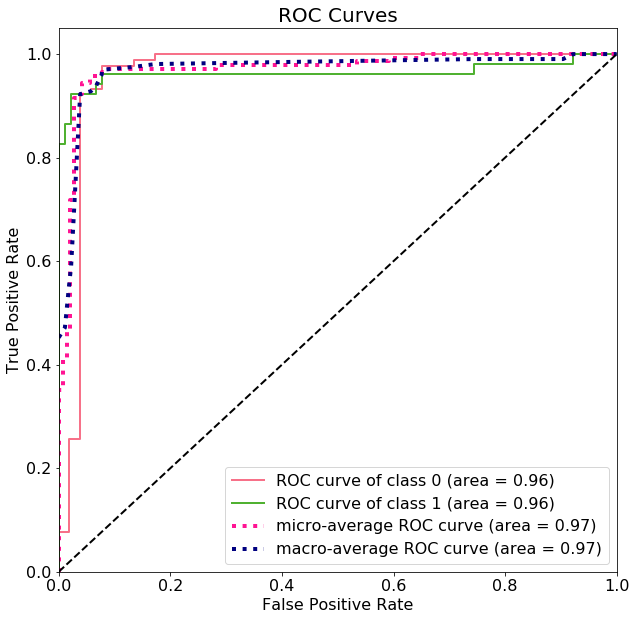

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
skplt.metrics.plot_roc(y_test, lr.predict_proba(x_test), plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap, ax=ax)
#plt.legend(loc='lower right')
plt.show()